In [5]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [20]:
result_dir = '../Models/Results/'
files = os.listdir(result_dir)

In [47]:
len(files)/8

26.0

In [22]:
for i in range(len(files)):
    # print(files[i])
    if files[i] == 'README.md':
        continue
    files[i] = [" ".join(files[i].split('_')[:-2]), int(files[i].split('_')[-1]), files[i]]

In [24]:
def open_json(file):
    with open(file, encoding='utf-8') as f:
        data = json.load(f)
    return data

In [40]:
open_json(result_dir + files[0][2])

{'Accuracy Train Dev': 0.7452733362143474,
 'Accuracy Test': 0.6361650485436893,
 'Weighted F1 Train Dev': 0.7456327994832938,
 'Weighted F1 Test': 0.6369593906149363,
 'Macro F1 Train Dev': 0.7449699425630292,
 'Macro F1 Test': 0.6358080097729895,
 'Micro F1 Train Dev': 0.7452733362143474,
 'Micro F1 Test': 0.6361650485436893,
 'Weighted Recall Train Dev': 0.7452733362143474,
 'Weighted Recall Test': 0.6361650485436893,
 'Macro Recall Train Dev': 0.7469156432819516,
 'Macro Recall Test': 0.6395236000167606,
 'Micro Recall Train Dev': 0.7452733362143474,
 'Micro Recall Test': 0.6361650485436893,
 'Confusion Matrix Train Dev': [[13158, 3959], [5472, 14435]],
 'Confusion Matrix Test': [[1246, 606], [893, 1375]]}

In [98]:
def plot(dataset):
    data_accuracy = {}
    data_f1 = {}
    for file in files:
        name_without_seed = file[0]
        seed = file[1]
        full_name = file[2]
        if dataset.lower() in full_name:
            if name_without_seed not in data_accuracy:
                data_accuracy[name_without_seed] = []
            temp = open_json(result_dir + full_name)
            data_accuracy[name_without_seed].append(temp['Accuracy Test'])
            if name_without_seed not in data_f1:
                data_f1[name_without_seed] = []
            data_f1[name_without_seed].append(temp['Macro F1 Test'])
    # dataframe for accuracy
    df_accuracy = pd.DataFrame(data_accuracy)
    # dataframe for f1
    df_f1 = pd.DataFrame(data_f1)
    # Remove the word 'dynahate' from the column names
    df_accuracy.columns = df_accuracy.columns.str.replace(dataset.lower(), '')
    df_f1.columns = df_f1.columns.str.replace(dataset.lower(), '')
    # Sort the columns by average accuracy
    df_accuracy = df_accuracy.reindex(df_accuracy.mean().sort_values(ascending=False).index, axis=1)
    df_f1 = df_f1.reindex(df_f1.mean().sort_values(ascending=False).index, axis=1)
    plt.figure(figsize=(15, 6))
    sns.set(style="whitegrid")
    ax = sns.barplot(data=df_accuracy, ci="sd")
    # rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
    # title
    plt.title(dataset)
    ax.set(xlabel='Model', ylabel='Accuracy')
    # plt.tight_layout()
    plt.savefig('Plots/Accuracy_' + dataset + '.png')

    plt.figure(figsize=(15, 6))
    sns.set(style="whitegrid")
    ax = sns.barplot(data=df_f1, ci="sd")
    # rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
    # title
    plt.title(dataset)
    ax.set(xlabel='Model', ylabel='Macro F1')
    # plt.tight_layout()
    plt.savefig('Plots/F1_' + dataset + '.png')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15128\2719342386.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(data=df_accuracy, ci="sd")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15128\2719342386.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(data=df_f1, ci="sd")


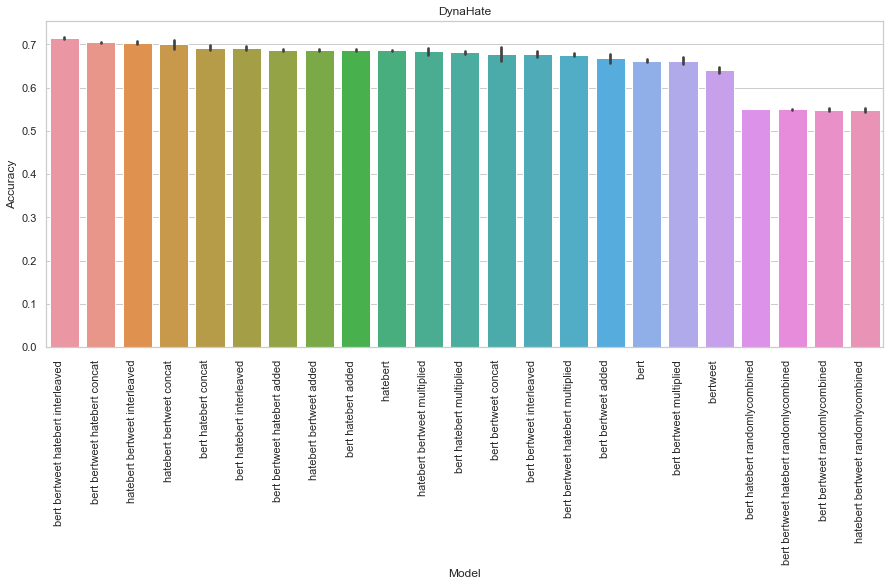

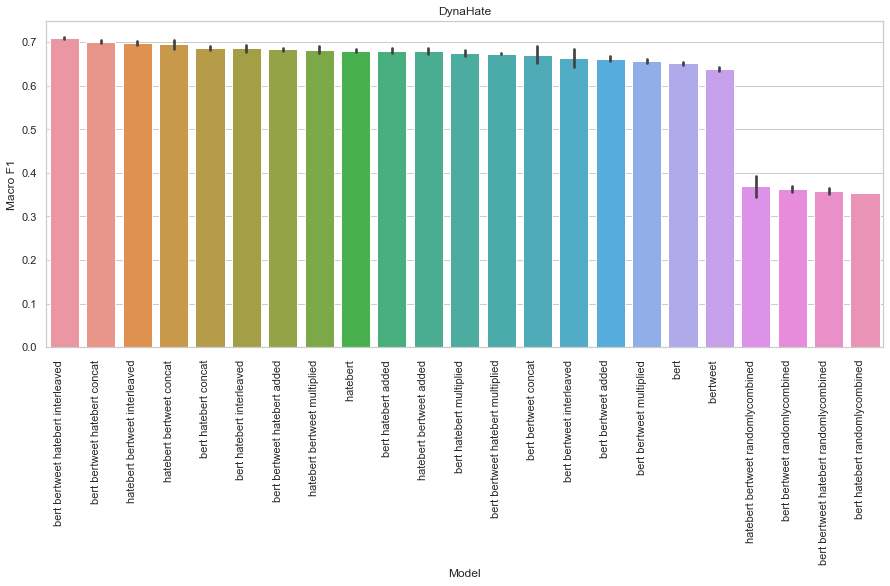

In [99]:
plot('DynaHate')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15128\2719342386.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(data=df_accuracy, ci="sd")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15128\2719342386.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(data=df_f1, ci="sd")


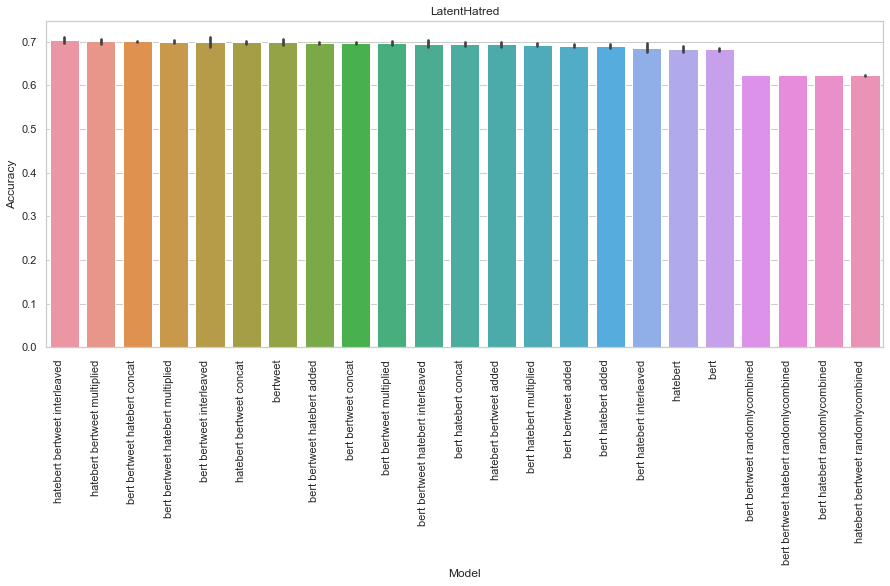

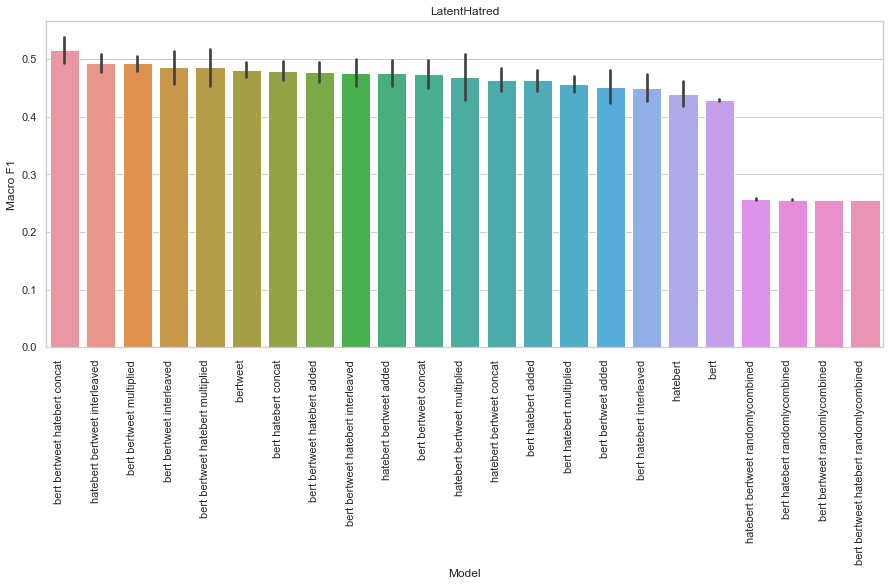

In [100]:
plot('LatentHatred')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15128\2719342386.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(data=df_accuracy, ci="sd")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15128\2719342386.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(data=df_f1, ci="sd")


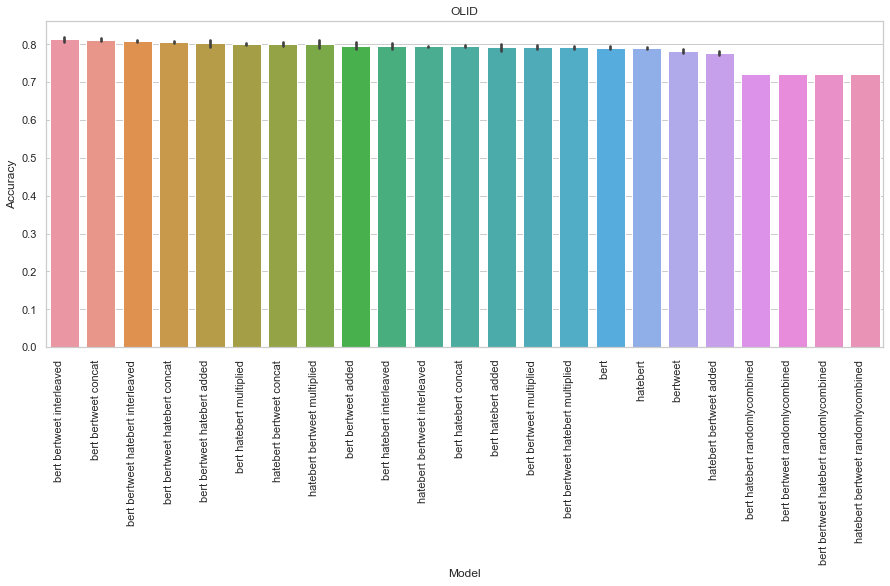

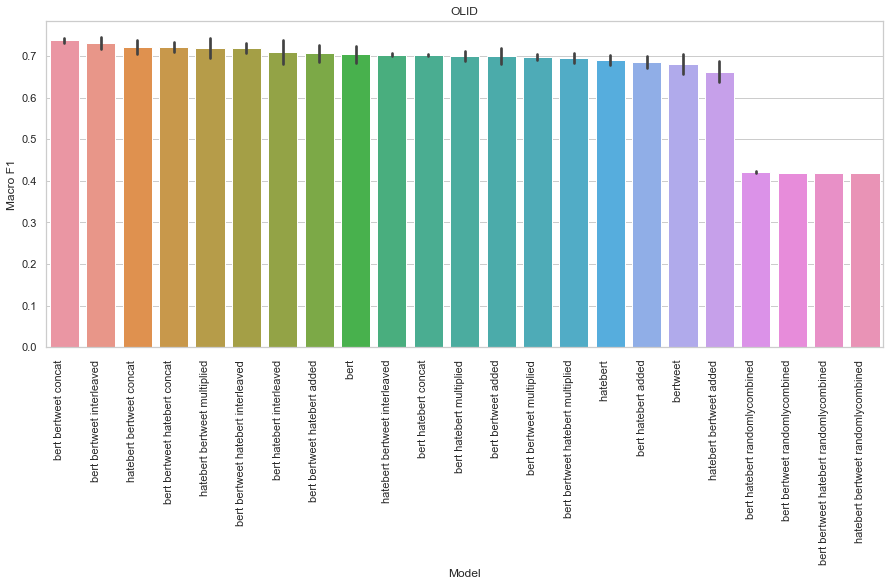

In [101]:
plot('OLID')